In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from google.colab import files
files.upload()

Saving heart_v2.csv to heart_v2.csv


{'heart_v2.csv': b'age,sex,BP,cholestrol,heart disease\r\n70,1,130,322,1\r\n67,0,115,564,0\r\n57,1,124,261,1\r\n64,1,128,263,0\r\n74,0,120,269,0\r\n65,1,120,177,0\r\n56,1,130,256,1\r\n59,1,110,239,1\r\n60,1,140,293,1\r\n63,0,150,407,1\r\n59,1,135,234,0\r\n53,1,142,226,0\r\n44,1,140,235,0\r\n61,1,134,234,1\r\n57,0,128,303,0\r\n71,0,112,149,0\r\n46,1,140,311,1\r\n53,1,140,203,1\r\n64,1,110,211,0\r\n40,1,140,199,0\r\n67,1,120,229,1\r\n48,1,130,245,0\r\n43,1,115,303,0\r\n47,1,112,204,0\r\n54,0,132,288,0\r\n48,0,130,275,0\r\n46,0,138,243,0\r\n51,0,120,295,0\r\n58,1,112,230,1\r\n71,0,110,265,0\r\n57,1,128,229,1\r\n66,1,160,228,0\r\n37,0,120,215,0\r\n59,1,170,326,1\r\n50,1,144,200,1\r\n48,1,130,256,1\r\n61,1,140,207,1\r\n59,1,160,273,1\r\n42,1,130,180,0\r\n48,1,122,222,0\r\n40,1,152,223,1\r\n62,0,124,209,0\r\n44,1,130,233,0\r\n46,1,101,197,0\r\n59,1,126,218,1\r\n58,1,140,211,0\r\n49,1,118,149,1\r\n44,1,110,197,1\r\n66,1,160,246,1\r\n65,0,150,225,1\r\n42,1,136,315,1\r\n52,1,128,205,0\r\n65,0,1

In [3]:
heart_data = pd.read_csv('heart_v2.csv')
heart_data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [4]:
heart_data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
heart_data.tail()

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [6]:
heart_data.shape

(270, 5)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [8]:
heart_data.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [9]:
heart_data.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

**Correlation**

1. Positive Correlation
2. Negative Correlation

In [10]:
correlation = heart_data.corr()

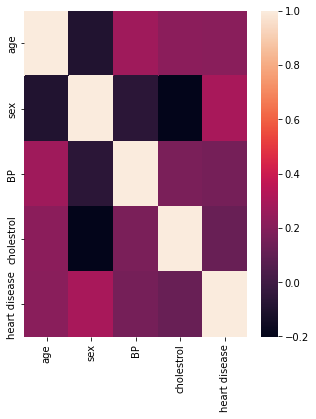

In [11]:
plot = plt.figure(figsize = (5,6))
sns.heatmap(heart_data.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


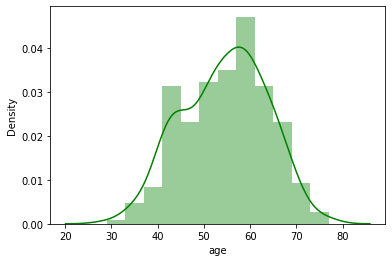

In [13]:
# checking heart disease age 
sns.distplot(heart_data['age'], color = 'green')

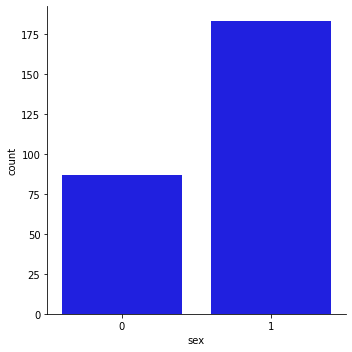

In [16]:
# checking with gender
sns.catplot(x = 'sex', data = heart_data, color = 'blue', kind = 'count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


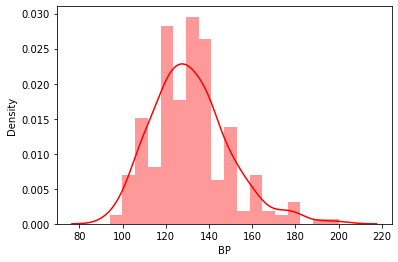

In [17]:
# checking with BP
sns.distplot(heart_data['BP'], color = 'red')

**Splitting features and target**

In [20]:
X = heart_data.drop(columns = 'heart disease', axis = 1)
Y = heart_data['heart disease']

In [21]:
print(X)

     age  sex   BP  cholestrol
0     70    1  130         322
1     67    0  115         564
2     57    1  124         261
3     64    1  128         263
4     74    0  120         269
..   ...  ...  ...         ...
265   52    1  172         199
266   44    1  120         263
267   56    0  140         294
268   57    1  140         192
269   67    1  160         286

[270 rows x 4 columns]


In [22]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64


**Splitting into training data and testing data**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

**Model Training random Forest Regressor**

In [24]:
regressor = RandomForestRegressor(n_estimators = 100)

In [25]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [26]:
X_test_prediction = regressor.predict(X_test)

In [27]:
print(X_test_prediction)

[0.31 0.03 0.92 0.96 0.5  0.04 0.34 0.01 0.02 0.93 0.26 0.52 0.07 0.93
 0.8  0.46 0.7  0.38 0.48 0.35 0.23 0.96 0.11 0.73 0.48 0.36 0.91 0.15
 0.45 0.15 0.57 0.58 0.17 0.6  0.14 0.   0.88 0.22 0.49 0.32 0.48 0.16
 0.4  0.   0.08 0.83 0.21 0.05 0.05 0.45 0.01 0.22 0.17 0.15]


In [28]:
# R Squared Error
error_score = metrics.r2_score(Y_test, X_test_prediction)
print('R Squared Error: ', error_score)

R Squared Error:  -0.01075880681818231


In [29]:
Y_test = list(Y_test)

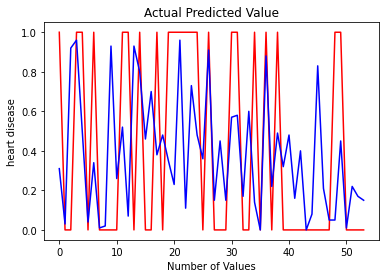

In [31]:
plt.plot(Y_test, color = 'red', label = 'Actual Value')
plt.plot(X_test_prediction, color = 'blue', label = 'Predicted Value')
plt.title('Actual Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('heart disease')
plt.show()